In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df_full = pd.read_json('grid_search_results_full.json')

# drop columns with beta < 1
#df = df[df['beta'] >= 1.1]
#df = df[df['T'] >= 0.11]

In [8]:
df_full.head()

,beta,T,mean_accuracy,accuracies,seconds
0,0.5,0.1,49.913197,"[49.64999771118164, 50.61000061035156, 50.9399...",1374.581463
1,0.5,0.5,49.930595,"[49.64999771118164, 50.61000061035156, 50.9399...",1380.386635
2,0.5,1.0,49.962593,"[49.64999771118164, 50.61000061035156, 50.9399...",1386.187271
3,0.5,2.0,49.946800,"[49.64999771118164, 50.61000061035156, 50.9399...",1388.640818
4,0.5,5.0,49.970497,"[49.64999771118164, 50.61000061035156, 50.9399...",1385.494688


In [9]:
baseline = [55.27000046, 56.23500061, 57.20000076, 58.16500092, 59.13000107,
        60.09500122, 61.06000137, 62.02500153, 62.99000168, 63.95500183,
        64.91999817, 65.88500214, 66.84999847, 67.81500244, 68.77999878,
        69.74500275, 70.70999908, 71.67500305, 72.63999939, 73.60500336,
        74.56999969]

In [11]:
np.unique(df_full['T'])

array([0.1, 0.5, 1. , 2. , 5. ])

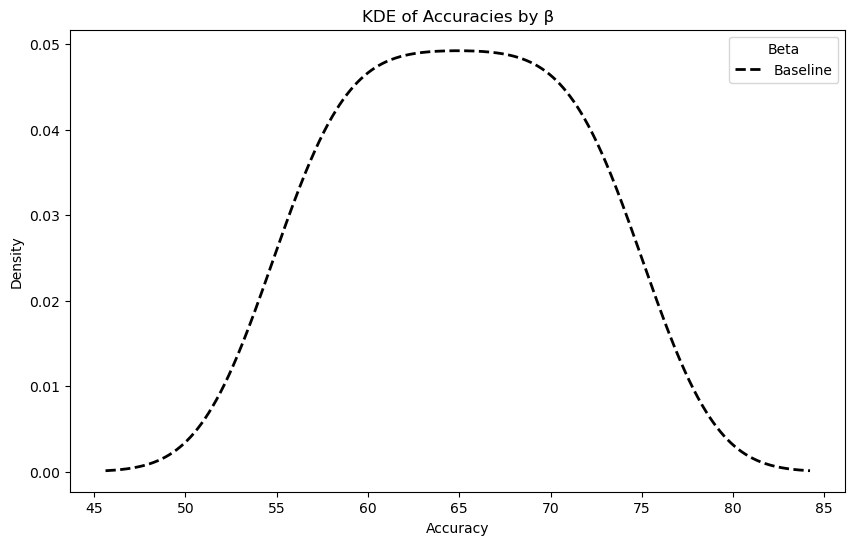

In [20]:
from matplotlib.colors import LogNorm

df = df_full[df_full['T'] == 10.0]

# normalize beta to [0,1] and pick a colormap
norm = LogNorm(vmin=df['beta'].min(), vmax=df['beta'].max())
cmap = plt.cm.viridis
fig, ax = plt.subplots(figsize=(10, 6))

for _, row in df.iterrows():
    print(row['beta'])
    s = pd.Series(row['accuracies'], dtype=float)
    c = cmap(norm(row['beta']))
    s.plot.kde(color=c, bw_method='scott', label=f"β={row['beta']}", linewidth=2, )

s = pd.Series(baseline, dtype=float)
s.plot.kde(color='black', bw_method='scott', label="Baseline", linewidth=2, linestyle='--')

plt.xlabel("Accuracy")
plt.title("KDE of Accuracies by β")
plt.legend(title="Beta")
plt.show()